In [5]:
path = 'Data sets/example.txt'
open(path).readline()
import json
records =[json.loads(line) for line in open(path)]
records[0] #now records is a py dict


{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [19]:
# find the most common tz
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones
from collections import defaultdict
def get_count(sequence):
    counts = defaultdict(int) #初始化为0
    for x in sequence:
        counts[x] += 1
    return counts
counts = get_count(time_zones)
len(time_zones)
counts


defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

In [26]:
def top_counts(count_dict,n=10): # most popular 10 counts
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()] #for 的 tz count, 哪个在前就 sort 哪个值，这里 sort tz的值，
                                                                    #从低到高
    value_key_pairs.sort()
    return value_key_pairs[-n:]
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [29]:
#或者直接使用 collections.Counter 类 更加简单
from collections import Counter 
counts2 = Counter(time_zones)
counts2.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [32]:
#利用 pandas 进行计数
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [34]:

frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [37]:
# series 可以使用 value_count()
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [38]:
# clean data, fill the NA with missing 
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz=='']='Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

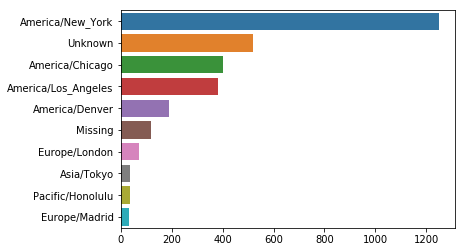

In [40]:
# use seaborn to plot a barplot 柱状图
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [44]:
frame['a'][12]
#now we need to interpret what kind of user agent we having
results = pd.Series([x.split()[0] for x in frame['a'].dropna()]) # 0 here is to only get the first part from the whole thing 
                                                                # need to drop na 
results[:5]
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [47]:
#TODO: seperate the tz by if the user is windows user
import numpy as np
cframe= frame[frame.a.notnull()] # get a frame[a] without the missing data 
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows') #where  = (x if c else y)
cframe['os'][:5]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [52]:
by_tz_os = cframe.groupby(['tz','os'])
by_tz_os.head()
agg_counts = by_tz_os.size().unstack().fillna(0) # use unstack() to reshape the dataframe
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [53]:
# get the most popular tz
indexer = agg_counts.sum(1).argsort() #argsort 间接排序, return the index of the sorted array
indexer[:10] # return tz # from less -> more 

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [55]:
count_subset = agg_counts.take(indexer[-10:]) # the last 10 rows have the most sum, 
                                            # and take() Take elements from an array along an axis.
count_subset 

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [57]:
# pandas.nlargest() does the same
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [63]:
# rearrange the data for plotting
count_subset = pd.DataFrame(count_subset).stack()
count_subset.name ='total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,level_2,total
0,America/Sao_Paulo,Not Windows,total,13.0
1,America/Sao_Paulo,Windows,total,20.0
2,Europe/Madrid,Not Windows,total,16.0
3,Europe/Madrid,Windows,total,19.0
4,Pacific/Honolulu,Not Windows,total,0.0
5,Pacific/Honolulu,Windows,total,36.0
6,Asia/Tokyo,Not Windows,total,2.0
7,Asia/Tokyo,Windows,total,35.0
8,Europe/London,Not Windows,total,43.0
9,Europe/London,Windows,total,31.0


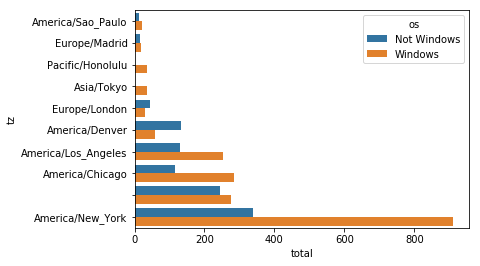

In [64]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

In [65]:
# to see the percentage of each part， we define the percentage to 1 for every group of the tz
def norm_total(group):
    group['normed_data'] = group.total/group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)
results[:10]


,tz,os,level_2,total,normed_data
0,America/Sao_Paulo,Not Windows,total,13.0,0.393939
1,America/Sao_Paulo,Windows,total,20.0,0.606061
2,Europe/Madrid,Not Windows,total,16.0,0.457143
3,Europe/Madrid,Windows,total,19.0,0.542857
4,Pacific/Honolulu,Not Windows,total,0.0,0.000000
5,Pacific/Honolulu,Windows,total,36.0,1.000000
6,Asia/Tokyo,Not Windows,total,2.0,0.054054
7,Asia/Tokyo,Windows,total,35.0,0.945946
8,Europe/London,Not Windows,total,43.0,0.581081
9,Europe/London,Windows,total,31.0,0.418919


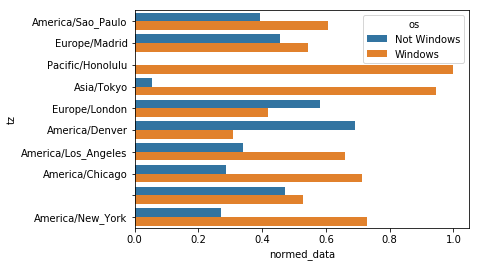

In [68]:
sns.barplot(x='normed_data',y='tz',hue='os',data=results) # normed_data is now a col that contains the percentage in each tz group

In [77]:
# or using the transform() in groupby, to define the percentage 1
g = count_subset.groupby('tz')
g.total.transform('sum')
results2 = count_subset.total/g.total.transform('sum')
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64